In [1]:
# Import dependencies
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from citipy import citipy
import requests 
from config import weather_api_key
from datetime import datetime


In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)


In [4]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each lats and lngs combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


616

In [5]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key



In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval             ")
print("-------------------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the URL, record and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city info into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found.  Skipping...")
        pass

# Indicate that Data loading is complete.
print("-------------------------------------")
print("Data Retrieval Complete              ")
print("-------------------------------------")


entil
Processing Record 24 of Set 4 | ketchikan
Processing Record 25 of Set 4 | tabou
Processing Record 26 of Set 4 | grindavik
Processing Record 27 of Set 4 | tessalit
Processing Record 28 of Set 4 | saleaula
City not found.  Skipping...
Processing Record 29 of Set 4 | matagami
Processing Record 30 of Set 4 | chagda
City not found.  Skipping...
Processing Record 31 of Set 4 | aklavik
Processing Record 32 of Set 4 | amderma
City not found.  Skipping...
Processing Record 33 of Set 4 | maua
Processing Record 34 of Set 4 | gizycko
Processing Record 35 of Set 4 | musiri
Processing Record 36 of Set 4 | hambantota
Processing Record 37 of Set 4 | borovskoy
Processing Record 38 of Set 4 | provideniya
Processing Record 39 of Set 4 | clyde river
Processing Record 40 of Set 4 | bengkulu
City not found.  Skipping...
Processing Record 41 of Set 4 | hasaki
Processing Record 42 of Set 4 | nioro
Processing Record 43 of Set 4 | buchanan
Processing Record 44 of Set 4 | dibaya
City not found.  Skipping..

In [7]:
# Check number of city with data
len(city_data)


550

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Galveston,40.58,-86.19,37.00,93,90,6.93,US,2020-01-04 11:17:48
1,Ushuaia,-54.81,-68.31,46.40,75,40,3.36,AR,2020-01-04 11:15:10
2,Guozhen,29.30,113.14,46.40,79,96,3.78,CN,2020-01-04 11:17:49
3,Upernavik,72.79,-56.15,-32.13,99,96,14.38,GL,2020-01-04 11:17:49
4,Geraldton,49.72,-86.95,12.20,92,90,2.24,CA,2020-01-04 11:17:49
5,Atuona,-9.80,-139.03,80.55,76,28,17.87,PF,2020-01-04 11:17:50
6,Busselton,-33.64,115.35,69.01,32,0,18.70,AU,2020-01-04 11:17:50
7,Port Alfred,-33.59,26.89,71.01,98,75,1.01,ZA,2020-01-04 11:17:51
8,Yulara,-25.24,130.99,62.60,100,75,19.46,AU,2020-01-04 11:17:51
9,Byron Bay,-28.65,153.62,77.00,73,0,13.87,AU,2020-01-04 11:17:51


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Galveston,US,2020-01-04 11:17:48,40.58,-86.19,37.00,93,90,6.93
1,Ushuaia,AR,2020-01-04 11:15:10,-54.81,-68.31,46.40,75,40,3.36
2,Guozhen,CN,2020-01-04 11:17:49,29.30,113.14,46.40,79,96,3.78
3,Upernavik,GL,2020-01-04 11:17:49,72.79,-56.15,-32.13,99,96,14.38
4,Geraldton,CA,2020-01-04 11:17:49,49.72,-86.95,12.20,92,90,2.24
5,Atuona,PF,2020-01-04 11:17:50,-9.80,-139.03,80.55,76,28,17.87
6,Busselton,AU,2020-01-04 11:17:50,-33.64,115.35,69.01,32,0,18.70
7,Port Alfred,ZA,2020-01-04 11:17:51,-33.59,26.89,71.01,98,75,1.01
8,Yulara,AU,2020-01-04 11:17:51,-25.24,130.99,62.60,100,75,19.46
9,Byron Bay,AU,2020-01-04 11:17:51,-28.65,153.62,77.00,73,0,13.87


In [10]:
# Create the output file (csv)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a csv file
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [12]:
# import time dependency
import time 


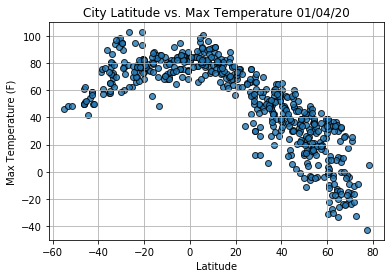

In [13]:
# Build the scatter plot for lats vs max temp
plt.scatter(lats, max_temps, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()



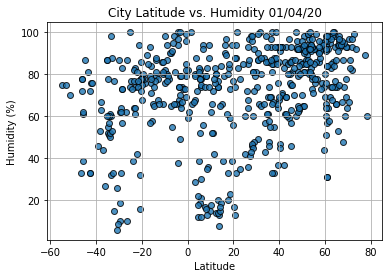

In [14]:
# Build the scatter plot for lats vs humidity
plt.scatter(lats, humidity, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()



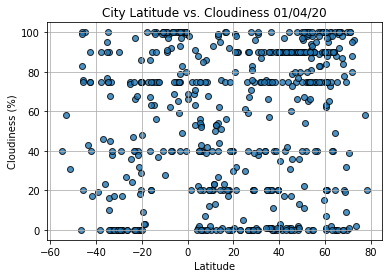

In [15]:
# Build the scatter plot for lats vs cloudiness
plt.scatter(lats, cloudiness, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()


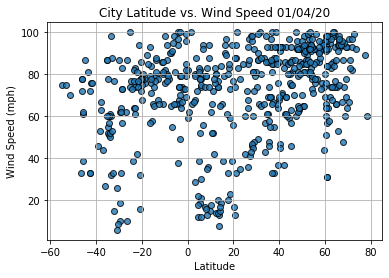

In [16]:
# Build the scatter plot for lats vs wind speed
plt.scatter(lats, humidity, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()
